<h2>Project Outline</h2>

**Imported/Downloaded the Data**
- Accessed financial data using one of the APIs accessed through the pandas-datareader package or from websites such as Yahoo Finance.
- Loaded the data into a pandas DataFrame so that it can easily view and manipulate the data.<br />

**Calculated Financial Statistics**
- Calculated some of the financial statistics (i.e. variance, standard deviation, linear regression) that I have learned about to gain insights into the stocks and how they relate to each other. What are the returns of the stocks over different time periods? How risky are each of the stocks when compared to each other? Do the returns of the stocks correlate with each other, or are they diversified?<br />

**Optimized Portfolio**
- Performed a mean-variance portfolio optimization that shows the efficient frontier for the group of stocks you have selected. If the investor is less risky, how should they allocate their funds across the portfolio? If the investor is more risky, how should they allocate their funds? Indicate multiple investment options at different risk levels and specify the returns.<br />


In [27]:
import pandas as pd
import numpy as np
import seaborn as sn
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import random

In [28]:
import cvxopt as opt
from cvxopt import blas, solvers

<h2>Portfolio</h2>

Tesla Motors (TSLA), Palantir Technolgies Inc.(PLTR), Johnson & Johnson (JNJ), Disney (DIS)

<h2>Stock Analysis</h2>

- Pulling stock data from Yahoo API for stocks above.
- Start date is from when PLTR went public.

In [3]:
symbols = ['TSLA', 'PLTR', 'JNJ', 'DIS']
start_date = datetime(2020, 9, 30)
end_date = datetime(2021, 5, 16)
stock_data = web.get_data_yahoo(symbols, start_date, end_date)
stock_data

Attributes   Adj Close                                          Close  \
Symbols           TSLA       PLTR         JNJ         DIS        TSLA   
Date                                                                    
2020-09-30  429.010010   9.500000  146.936356  124.080002  429.010010   
2020-10-01  448.160004   9.460000  145.396729  123.309998  448.160004   
2020-10-02  415.089996   9.200000  144.330826  122.550003  415.089996   
2020-10-05  425.679993   9.030000  146.294830  123.370003  425.679993   
2020-10-06  413.980011   9.900000  144.350555  120.930000  413.980011   
...                ...        ...         ...         ...         ...   
2021-04-13  762.320007  25.420000  159.479996  185.490005  762.320007   
2021-04-14  732.229980  23.700001  159.919998  187.460007  732.229980   
2021-04-15  738.849976  23.150000  160.389999  185.929993  738.849976   
2021-04-16  739.780029  22.469999  162.240005  187.259995  739.780029   
2021-04-19  711.900024  21.932501  162.889999  186.839905  711.900024   

Attributes                                           High             ...  \
Symbols          PLTR         JNJ         DIS        TSLA       PLTR  ...   
Date                                                                  ...   
2020-09-30   9.500000  148.880005  124.080002  433.929993  11.410000  ...   
2020-10-01   9.460000  147.320007  123.309998  448.880005  10.100000  ...   
2020-10-02   9.200000  146.240005  122.550003  439.130005   9.280000  ...   
2020-10-05   9.030000  148.229996  123.370003  433.640015   9.490000  ...   
2020-10-06   9.900000  146.259995  120.930000  428.779999  10.180000  ...   
...               ...         ...         ...         ...        ...  ...   
2021-04-13  25.420000  159.479996  185.490005  763.000000  25.659000  ...   
2021-04-14  23.700001  159.919998  187.460007  780.789978  26.200001  ...   
2021-04-15  23.150000  160.389999  185.929993  743.690002  24.059999  ...   
2021-04-16  22.469999  162.240005  187.259995  749.409973  23.260000  ...   
2021-04-19  21.932501  162.889999  186.839905  725.400024  22.330000  ...   

Attributes         Low                    Open                         \
Symbols            JNJ         DIS        TSLA       PLTR         JNJ   
Date                                                                    
2020-09-30  146.839996  123.239998  421.320007  10.000000  147.449997   
2020-10-01  146.460007  122.419998  440.760010   9.690000  149.309998   
2020-10-02  145.830002  121.690002  421.390015   9.060000  146.210007   
2020-10-05  146.419998  122.330002  423.350006   9.430000  147.000000   
2020-10-06  145.869995  120.610001  423.790009   9.040000  148.279999   
...                ...         ...         ...        ...         ...   
2021-04-13  156.529999  184.600006  712.700012  23.190001  156.860001   
2021-04-14  157.539993  185.710007  770.700012  25.350000  157.830002   
2021-04-15  160.229996  185.699997  743.099976  24.010000  160.720001   
2021-04-16  160.559998  186.199997  728.650024  22.860001  161.339996   
2021-04-19  160.839996  185.649994  719.599976  22.150000  162.500000   

Attributes                  Volume                                       
Symbols            DIS        TSLA         PLTR         JNJ         DIS  
Date                                                                     
2020-09-30  123.239998  48145600.0  338584400.0   8487700.0  13642500.0  
2020-10-01  124.940002  50741500.0  124297600.0   6457800.0   8908300.0  
2020-10-02  121.989998  71430000.0   55018300.0   5485600.0   6490200.0  
2020-10-05  123.260002  44722800.0   36316900.0   4992800.0   5919200.0  
2020-10-06  123.129997  49146300.0   90864000.0   5118200.0   9052000.0  
...                ...         ...          ...         ...         ...  
2021-04-13  185.589996  44652800.0   83913500.0  18424100.0   6826500.0  
2021-04-14  185.970001  49017400.0  108793800.0   7718300.0   9089900.0  
2021-04-15  188.089996  27848900.0   58849300.0   7524600.0  

In [4]:
stock_data_df = pd.DataFrame(stock_data['Adj Close'].to_records())
stock_data_df.columns = [hdr.replace("('symbols', ", "date.").replace(")", "") \
                     for hdr in stock_data_df.columns]
stock_data_df.rename(columns={'Date' : 'Date(Y/M/D)'}, inplace=True)
stock_data_df

,Date(Y/M/D),TSLA,PLTR,JNJ,DIS
0,2020-09-30,429.010010,9.500000,146.936356,124.080002
1,2020-10-01,448.160004,9.460000,145.396729,123.309998
2,2020-10-02,415.089996,9.200000,144.330826,122.550003
3,2020-10-05,425.679993,9.030000,146.294830,123.370003
4,2020-10-06,413.980011,9.900000,144.350555,120.930000
...,...,...,...,...,...
133,2021-04-13,762.320007,25.420000,159.479996,185.490005
134,2021-04-14,732.229980,23.700001,159.919998,187.460007
135,2021-04-15,738.849976,23.150000,160.389999,185.929993
136,2021-04-16,739.780029,22.469999,162.240005,187.259995


<h2>Plot of the Adjusted Close Price over Time</h2>

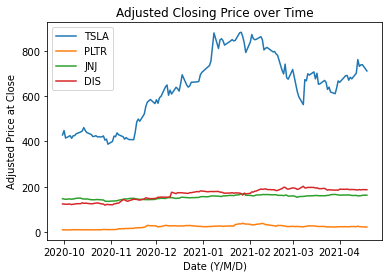

In [5]:
plt.plot(stock_data.index, stock_data['Adj Close'])
plt.legend(symbols)
plt.xlabel('Date (Y/M/D)')
plt.ylabel('Adjusted Price at Close')
plt.title('Adjusted Closing Price over Time')
plt.show()

In [6]:
selected=list(stock_data.columns[0:])

returns_monthly = stock_data[selected].pct_change()

<h2>Plot of the daily simple rate of return over time</h2>

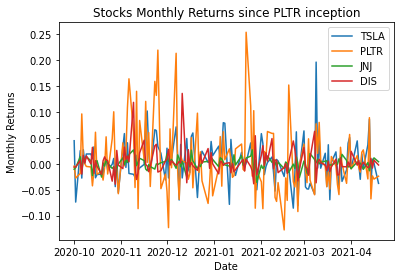

In [7]:
plt.plot(returns_monthly.index, returns_monthly['Adj Close'])
plt.legend(symbols)
plt.xlabel('Date')
plt.ylabel('Monthly Returns')
plt.title('Stocks Monthly Returns since PLTR inception')
plt.savefig('Capstone_1_QR.png')
plt.show()

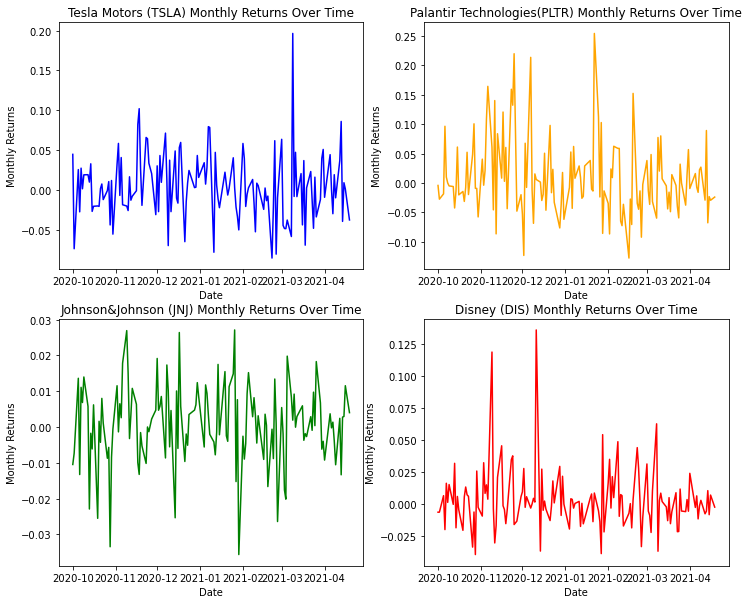

In [8]:
plt.figure(figsize=(12,10))
ax1 = plt.subplot(2,2,1)
plt.plot(returns_monthly.index, returns_monthly["Adj Close"]["TSLA"], color='blue')
plt.xlabel("Date")
plt.ylabel("Monthly Returns")
plt.title("Tesla Motors (TSLA) Monthly Returns Over Time")

ax1 = plt.subplot(2,2,2)
plt.plot(returns_monthly.index, returns_monthly["Adj Close"]["PLTR"], color='orange')
plt.xlabel("Date")
plt.ylabel("Monthly Returns")
plt.title("Palantir Technologies(PLTR) Monthly Returns Over Time")

ax3 = plt.subplot(2,2,3)
plt.plot(returns_monthly.index, returns_monthly["Adj Close"]["JNJ"], color='green')
plt.xlabel("Date")
plt.ylabel("Monthly Returns")
plt.title("Johnson&Johnson (JNJ) Monthly Returns Over Time")

ax4 = plt.subplot(2,2,4)
plt.plot(returns_monthly.index, returns_monthly["Adj Close"]["DIS"], color='red')
plt.xlabel("Date")
plt.ylabel("Monthly Returns")
plt.title("Disney (DIS) Monthly Returns Over Time")
plt.show()

<h2>Plot of the mean of each stock's daily simple rate of return</h2>

In [9]:
expected_returns = returns_monthly.mean()

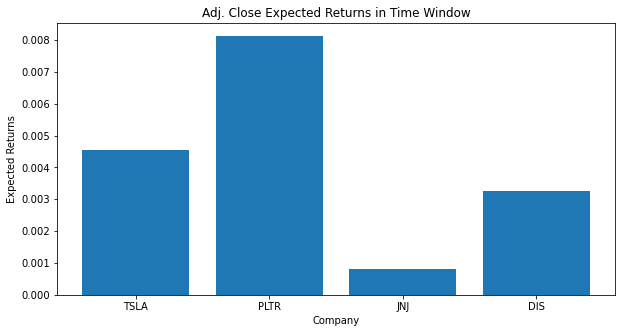

In [10]:
fig, ax = plt.subplots(figsize= (10,5))
plt.bar(range(len(expected_returns['Adj Close'])), expected_returns['Adj Close'])
ax.set_xticks(range(len(expected_returns['Adj Close'])))
ax.set_xticklabels(['TSLA', 'PLTR', 'JNJ', 'DIS'])
plt.xlabel('Company')
plt.ylabel('Expected Returns')
plt.title('Adj. Close Expected Returns in Time Window')
plt.savefig('Capstone_1_Expected_returns.png')
plt.show()

In [11]:
print('TSLA: ', expected_returns['Adj Close']['TSLA'])
print('PLTR: ', expected_returns['Adj Close']['PLTR'])
print('JNJ: ', expected_returns['Adj Close']['JNJ'])
print('DIS: ', expected_returns['Adj Close']['DIS'])

TSLA:  0.0045341104345606046
PLTR:  0.008130966417052469
JNJ:  0.0008128818992560805
DIS:  0.003262319208283413


In [12]:
expected_returns_var = returns_monthly.var()

In [13]:
expected_returns_var

Attributes  Symbols
Adj Close   TSLA       0.001707
            PLTR       0.004243
            JNJ        0.000121
            DIS        0.000564
Close       TSLA       0.001707
            PLTR       0.004243
            JNJ        0.000123
            DIS        0.000564
High        TSLA       0.001181
            PLTR       0.004864
            JNJ        0.000119
            DIS        0.000629
Low         TSLA       0.001555
            PLTR       0.003345
            JNJ        0.000139
            DIS        0.000391
Open        TSLA       0.001781
            PLTR       0.006031
            JNJ        0.000142
            DIS        0.000491
Volume      TSLA       0.197897
            PLTR       0.419218
            JNJ        0.321152
            DIS        1.009851
dtype: float64

<h2>Plot of the variance of each stock's daily simple rate of return</h2>

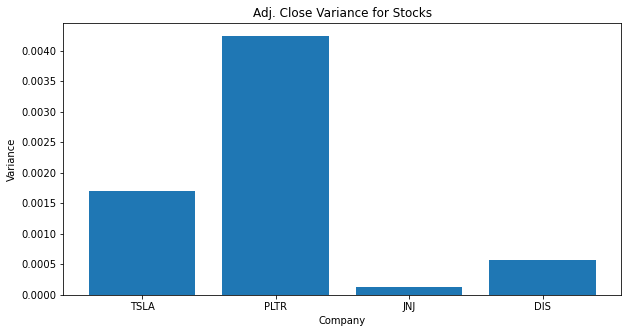

In [14]:
fig, ax = plt.subplots(figsize= (10,5))
plt.bar(range(len(expected_returns_var['Adj Close'])), expected_returns_var['Adj Close'])
ax.set_xticks(range(len(expected_returns_var['Adj Close'])))
ax.set_xticklabels(['TSLA', 'PLTR', 'JNJ', 'DIS'])
plt.xlabel('Company')
plt.ylabel('Variance')
plt.title('Adj. Close Variance for Stocks')
plt.savefig('Capstone_1_variance.png')
plt.show()

In [15]:
print('TSLA: ', expected_returns_var['Adj Close']['TSLA'])
print('PLTR: ', expected_returns_var['Adj Close']['PLTR'])
print('JNJ: ', expected_returns_var['Adj Close']['JNJ'])
print('DIS: ', expected_returns_var['Adj Close']['DIS'])

TSLA:  0.0017066492013362998
PLTR:  0.004242687073883488
JNJ:  0.00012096639782953241
DIS:  0.0005642359417952472


Palantir Technologies has the highest variance from Septermber 30, 2020 to April 16, 2021 indicating it is most likely the riskier investment. Johnson & johnson shows the least variance indicating it is most likely the least risky investment.

<h2>Plot of the standard deviation of each stock's daily simple rate of return</h2>

In [16]:
std_returns = returns_monthly.std()

In [17]:
std_returns

Attributes  Symbols
Adj Close   TSLA       0.041312
            PLTR       0.065136
            JNJ        0.010998
            DIS        0.023754
Close       TSLA       0.041312
            PLTR       0.065136
            JNJ        0.011082
            DIS        0.023754
High        TSLA       0.034370
            PLTR       0.069746
            JNJ        0.010914
            DIS        0.025074
Low         TSLA       0.039428
            PLTR       0.057832
            JNJ        0.011790
            DIS        0.019782
Open        TSLA       0.042202
            PLTR       0.077659
            JNJ        0.011907
            DIS        0.022157
Volume      TSLA       0.444856
            PLTR       0.647470
            JNJ        0.566703
            DIS        1.004913
dtype: float64

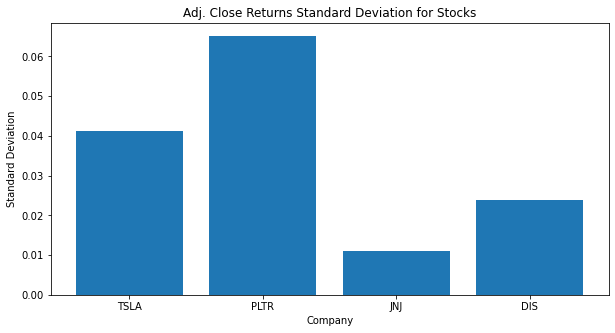

In [18]:
fig, ax = plt.subplots(figsize= (10,5))
plt.bar(range(len(std_returns['Adj Close'])), std_returns['Adj Close'])
ax.set_xticks(range(len(std_returns['Adj Close'])))
ax.set_xticklabels(['TSLA', 'PLTR', 'JNJ', 'DIS'])
plt.xlabel('Company')
plt.ylabel('Standard Deviation')
plt.title('Adj. Close Returns Standard Deviation for Stocks')

plt.show()



In [19]:
print('TSLA: ', std_returns['Adj Close']['TSLA'])
print('PLTR: ', std_returns['Adj Close']['PLTR'])
print('JNJ: ', std_returns['Adj Close']['JNJ'])
print('DIS: ', std_returns['Adj Close']['DIS'])

TSLA:  0.04131161097483733
PLTR:  0.0651359123209577
JNJ:  0.01099847252256114
DIS:  0.02375365112556904


Palantir is the most volatile stock but it also has the most mean return. This means that the the stock on average is making more money than the others. Tesla is a close second to Palantir. Johnson & Johnson is the least volatile of the bunch and has the least mean return.

In [29]:
corr_returns = returns_monthly['Adj Close'].cov()
corr_returns

Symbols,TSLA,PLTR,JNJ,DIS
Symbols,,,,
TSLA,0.001707,0.000942,0.000017,-0.000039
PLTR,0.000942,0.004243,-0.000041,-0.000051
JNJ,0.000017,-0.000041,0.000121,0.000076
DIS,-0.000039,-0.000051,0.000076,0.000564


Conclusion so far PLTR and TSLA appear to be postively correlated to each other. TSLA and DIS appear to be negatively correlated and PLTR and JNJ appear to also be negatively correlated with eachother. Overall, the stocks are only minimally correlated to eachother which helps diversification.

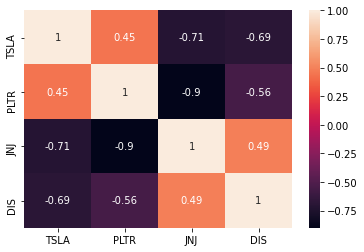

In [35]:
corr_matrix = pd.DataFrame(corr_returns, columns=['TSLA','PLTR','JNJ', 'DIS'])

corrMatrix = corr_matrix.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

<h2>Portfolio Optimization</h2>

In [40]:
expected_returns = returns_monthly['Adj Close'].mean()
corr_returns = returns_monthly['Adj Close'].cov()

In [43]:
def return_portfolios(expected_returns, cov_matrix):
    np.random.seed(1)
    port_returns = []
    port_volatility = []
    stock_weights = []
    
    selected = (expected_returns.axes)[0]
    
    num_assets = len(selected) 
    num_portfolios = 5000
    
    for single_portfolio in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        returns = np.dot(weights, expected_returns)
        volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        port_returns.append(returns)
        port_volatility.append(volatility)
        stock_weights.append(weights)
    
    portfolio = {'Returns': port_returns,
                 'Volatility': port_volatility}
    for counter,symbol in enumerate(selected):
        portfolio[f"{symbol} Weight"] = [Weight[counter] for Weight in stock_weights]
    
    df = pd.DataFrame(portfolio)
    
    column_order = ['Returns', 'Volatility'] + [f"{stock} Weight" for stock in selected]
    
    df = df[column_order]
   
    return df

In [44]:
random_portfolios = return_portfolios(expected_returns, corr_returns) 
print(random_portfolios.head().round(4))

   Returns  Volatility  TSLA Weight  PLTR Weight  JNJ Weight  DIS Weight
0   0.0063      0.0386       0.2896       0.5003      0.0001      0.2100
1   0.0036      0.0170       0.1904       0.1198      0.2416      0.4482
2   0.0044      0.0228       0.1945       0.2641      0.2055      0.3359
3   0.0059      0.0350       0.1148       0.4932      0.0154      0.3766
4   0.0057      0.0346       0.3175       0.4250      0.1068      0.1507


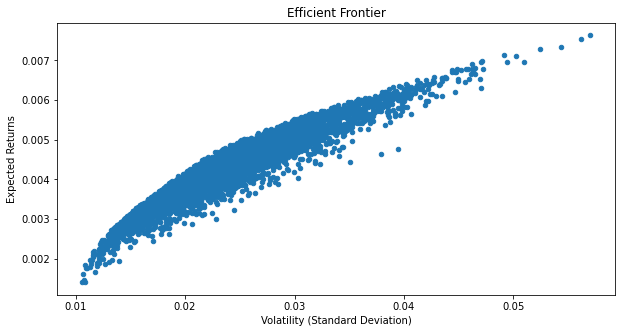

In [46]:
random_portfolios.plot.scatter(x='Volatility', y='Returns', figsize=(10,5))
plt.title('Efficient Frontier')
plt.ylabel('Expected Returns')
plt.xlabel('Volatility (Standard Deviation)')
plt.show()

In [47]:
returns_monthly = returns_monthly['Adj Close']

In [48]:
n = returns_monthly.shape[1]
n

4

In [49]:
def optimal_portfolio(returns):
    n = returns.shape[1]
    returns = np.transpose(returns.values)

    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]

    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))

    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x']
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

In [50]:
weights, returns, risks = optimal_portfolio(returns_monthly[1:])

     pcost       dcost       gap    pres   dres
 0: -4.3285e-03 -1.0083e+00  1e+00  0e+00  3e+00
 1: -4.3429e-03 -1.8263e-02  1e-02  1e-16  3e-02
 2: -5.2549e-03 -8.3237e-03  3e-03  2e-16  7e-03
 3: -8.0650e-03 -8.6984e-03  6e-04  8e-16  3e-05
 4: -8.1517e-03 -8.1588e-03  7e-06  1e-16  4e-07
 5: -8.1533e-03 -8.1534e-03  7e-08  2e-20  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.3252e-03 -1.0083e+00  1e+00  0e+00  3e+00
 1: -4.3394e-03 -1.8251e-02  1e-02  1e-16  3e-02
 2: -5.2466e-03 -8.3064e-03  3e-03  7e-17  7e-03
 3: -8.0427e-03 -8.6703e-03  6e-04  4e-16  1e-05
 4: -8.1257e-03 -8.1327e-03  7e-06  1e-16  2e-07
 5: -8.1273e-03 -8.1273e-03  7e-08  1e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.3214e-03 -1.0082e+00  1e+00  2e-16  3e+00
 1: -4.3356e-03 -1.8237e-02  1e-02  1e-16  3e-02
 2: -5.2374e-03 -8.2870e-03  3e-03  1e-16  7e-03
 3: -8.0141e-03 -8.6383e-03  6e-04  9e-16  3e-18
 4: -8.0965e-03 -8.1035e

In [54]:
print(weights)
symbols

[[6.85388147e-07]
 [9.99996476e-01]
 [1.37870046e-06]
 [1.46025791e-06]]


['TSLA', 'PLTR', 'JNJ', 'DIS']

In [56]:
companies = ['Tesla Motors', 'Palantir Technologies', 'Johnson & Johnson', 'Disney']
companies

['Tesla Motors', 'Palantir Technologies', 'Johnson & Johnson', 'Disney']

In [57]:
a = {'Company':companies, 'Symbol':symbols, 'Weight':[item for sublist in weights for item in sublist], 'Perc_Weight':["{:.1%}".format(item) for sublist in weights for item in sublist]}
print(a)

{'Company': ['Tesla Motors', 'Palantir Technologies', 'Johnson & Johnson', 'Disney'], 'Symbol': ['TSLA', 'PLTR', 'JNJ', 'DIS'], 'Weight': [6.853881466678981e-07, 0.9999964756534848, 1.37870046029315e-06, 1.4602579081752069e-06], 'Perc_Weight': ['0.0%', '100.0%', '0.0%', '0.0%']}


In [60]:
df = pd.DataFrame(a)

In [61]:
df

,Company,Symbol,Weight,Perc_Weight
0,Tesla Motors,TSLA,6.853881e-07,0.0%
1,Palantir Technologies,PLTR,9.999965e-01,100.0%
2,Johnson & Johnson,JNJ,1.378700e-06,0.0%
3,Disney,DIS,1.460258e-06,0.0%


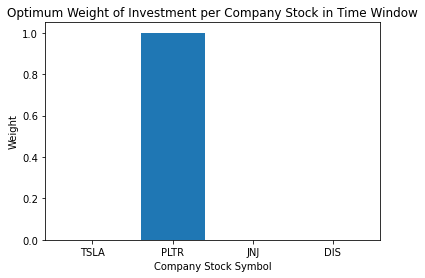

In [62]:
ax = plt.subplot()
plt.bar(range(len(df['Weight'])), df['Weight'])
ax.set_xticks(range(len(df['Weight'])))
ax.set_xticklabels(df['Symbol'])
plt.xlabel('Company Stock Symbol')
plt.ylabel('Weight')
plt.title('Optimum Weight of Investment per Company Stock in Time Window')
plt.show()

The plot above appears to recommend your portfolio has a very large weight (99.99%, nearly 100%) of Palantir and about the same distribution for the other five stocks. Otimized for historical risk and return data. Even though Palantir has the highest volatility, it has the highest return in the optimized portfolio.

In [63]:
print(risks)

[0.06531785853568382, 0.06531786280720178, 0.06531785622142885, 0.06531782812745271, 0.06531779358877263, 0.06531775073843675, 0.06531769699877746, 0.06531762871971002, 0.06531754058137257, 0.06531742457853076, 0.06531726824585829, 0.06531804812132963, 0.06531804501334393, 0.06531804038387738, 0.06531803318654086, 0.06531802140638789, 0.06531800045206262, 0.0653179549753814, 0.06531780290444868, 0.06531697659060741, 0.06531777617434102, 0.06299776342534505, 0.05894399042521183, 0.054807388295770726, 0.049681931995521185, 0.04519747043363492, 0.04129009078390341, 0.037900005715337054, 0.034973840148157145, 0.03246207423671922, 0.030318985012963387, 0.028502080343579962, 0.026971750674680103, 0.025691270847105756, 0.024626723577312437, 0.02374707089080139, 0.02302418653374599, 0.022432385601398843, 0.0219535041981557, 0.02138548216859711, 0.019643628609529836, 0.018138888097310183, 0.01684833210004957, 0.015747897679825443, 0.014815657686688022, 0.01403108344617177, 0.01337513276476366, 

In [64]:
single_asset_std=np.sqrt(np.diagonal(corr_returns))

In [65]:
single_asset_std

array([0.04130362, 0.06531806, 0.01103569, 0.02383672])

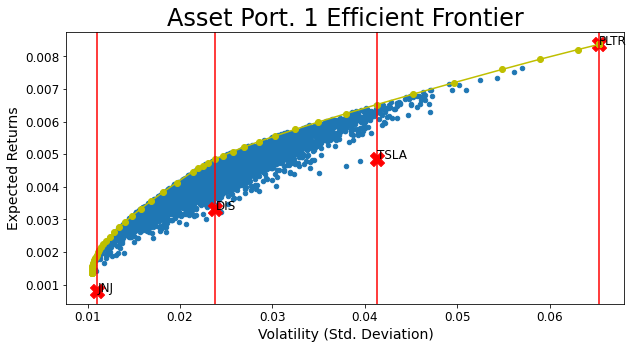

In [66]:
random_portfolios.plot.scatter(x='Volatility', y='Returns', fontsize=12, figsize=(10,5))
try:
    plt.plot(risks, returns, 'y-o')
except:
    pass
plt.scatter(single_asset_std,expected_returns,marker='X',color='red',s=200)
for i, txt in enumerate(symbols):
    plt.annotate(txt, (single_asset_std[i],expected_returns[i]), size=12)
for xc in single_asset_std:
    plt.axvline(x=xc, color='red')
plt.ylabel('Expected Returns',fontsize=14)
plt.xlabel('Volatility (Std. Deviation)',fontsize=14)
plt.title('Asset Port. 1 Efficient Frontier', fontsize=24)
plt.savefig("CapstoneOpt1_EfficientFrontier_withline.png")
plt.show()

Each blue dot shows the wide range of portfolios according to expected returns and volatility. The efficient frontier yellow line is on top of the top-left edge of the portfolio range. This line falls on the portfolios that maximize the expected return at all risks, and minimize the risk at all expected returns.
The vertical red lines in the figure to the right display the standard deviation of each asset. Notice, there are many portfolios (blue dots) with volatility lower than the least volatile asset. This feature results from having multiple, uncorrelated assets in the same portfolio.

In [73]:
expected_returns

Symbols
TSLA    0.004845
PLTR    0.008367
JNJ     0.000789
DIS     0.003303
dtype: float64

Palantir and Tesla are risky (high standard dev) stocks with a very high expected return.
From lessons but applies to my data too: The vertical red lines in the figure to the right display the standard deviation of each asset. Notice, there are a few portfolios (blue dots) with volatility at/lower than the least volatile asset. This feature results from having multiple, uncorrelated assets in the same portfolio.

In [75]:
random_portfolios.sort_values(["PLTR Weight"], ascending=False)

,Returns,Volatility,TSLA Weight,PLTR Weight,JNJ Weight,DIS Weight
2442,0.007631,0.056958,0.068013,0.856767,0.045989,0.029231
2918,0.007526,0.056133,0.088845,0.838800,0.064059,0.008296
2671,0.007325,0.054301,0.093701,0.809582,0.088312,0.008406
3047,0.007283,0.052409,0.146182,0.766207,0.049601,0.038009
217,0.007114,0.050223,0.049474,0.757576,0.040498,0.152452
...,...,...,...,...,...,...
840,0.003148,0.016947,0.224403,0.000670,0.200749,0.574178
4419,0.003450,0.019832,0.424588,0.000454,0.202929,0.372030
4973,0.002680,0.014675,0.169847,0.000313,0.352431,0.477409
2846,0.002554,0.014012,0.167456,0.000188,0.401041,0.431315


In [77]:
random_portfolios.sort_values(["TSLA Weight"], ascending=False)

,Returns,Volatility,TSLA Weight,PLTR Weight,JNJ Weight,DIS Weight
3327,0.004778,0.039447,0.943497,0.019753,0.031637,0.005113
4026,0.004650,0.037941,0.916756,0.003770,0.033872,0.045603
1517,0.004437,0.035046,0.840343,0.012991,0.090572,0.056093
4209,0.004589,0.034084,0.802042,0.037578,0.055800,0.104580
4921,0.004828,0.034310,0.758377,0.104633,0.069297,0.067694
...,...,...,...,...,...,...
4313,0.005734,0.034188,0.000869,0.501607,0.043723,0.453801
4883,0.004032,0.021935,0.000729,0.301374,0.317592,0.380306
400,0.003688,0.019205,0.000522,0.240755,0.332260,0.426462
4820,0.004412,0.023881,0.000514,0.324553,0.212886,0.462048


In [78]:
random_portfolios.sort_values(["DIS Weight"], ascending=False)

,Returns,Volatility,TSLA Weight,PLTR Weight,JNJ Weight,DIS Weight
1545,0.003339,0.021231,0.007854,0.041481,0.074067,0.876598
343,0.003695,0.021061,0.062395,0.064982,0.013041,0.859582
3974,0.003545,0.021023,0.018232,0.069148,0.053989,0.858631
599,0.003174,0.020382,0.045398,0.012276,0.103702,0.838625
1010,0.003595,0.020325,0.039759,0.077814,0.064910,0.817517
...,...,...,...,...,...,...
3466,0.005581,0.036647,0.522345,0.352726,0.124450,0.000478
309,0.005293,0.034500,0.498885,0.327231,0.173455,0.000429
4537,0.006048,0.040511,0.339684,0.512168,0.148038,0.000109
899,0.003807,0.023450,0.281214,0.247778,0.470959,0.000049


In [79]:
random_portfolios.sort_values(["JNJ Weight"], ascending=False)

,Returns,Volatility,TSLA Weight,PLTR Weight,JNJ Weight,DIS Weight
2558,0.001411,0.010613,0.073558,0.030206,0.858539,0.037697
3131,0.001811,0.011955,0.029028,0.112571,0.838199,0.020202
2020,0.001407,0.010878,0.114761,0.006554,0.838009,0.040676
464,0.001988,0.012460,0.032628,0.128054,0.800985,0.038333
3037,0.001962,0.012170,0.051524,0.115059,0.796815,0.036602
...,...,...,...,...,...,...
62,0.005516,0.029964,0.263733,0.356762,0.000156,0.379349
2465,0.005765,0.033417,0.383456,0.369459,0.000124,0.246962
2961,0.004339,0.025060,0.542459,0.039617,0.000103,0.417821
0,0.006283,0.038630,0.289640,0.500297,0.000079,0.209983


Sorting through the random portfolios, it appears that many portoflios with large weights of Palantir and Tesla have the highest returns and highest volatility.